Problem 1

In [2]:
morse = dict((
('A', '.-'),
('B', '-...'),
('C', '-.-.'),
('D', '-..'),
('E', '.'),
('F', '..-.'),
('G', '--.'),
('H', '....'),
('I', '..'),
('J', '.---'),
('K', '-.-'),
('L', '.-..'),
('M', '--'),
('N', '-.'),
('O', '---'),
('P', '.--.'),
('Q', '--.-'),
('R', '.-.'),
('S', '...'),
('T', '-'),
('U', '..-'),
('V', '...-'),
('W', '.--'),
('X', '-..-'),
('Y', '-.--'),
('Z', '--..'),
('1', '.----'),
('2', '..---'),
('3', '...--'),
('4', '....-'),
('5', '.....'),
('6', '-....'),
('7', '--...'),
('8', '---..'),
('9', '----.'),
('0', '-----')))

def EtoM(st,morse):
    st=st.upper()
    m=""
    for i in range (len(st)):
        if st[i]!=" ":
            m=m+morse[st[i]]+' '
        else:
            m=m+'/ '
    return m

def getkey(s,dic):
    for key in dic:
        if dic[key]==s:
            return key
def MtoE(st,morse):
    st=st+' '
    temp=''
    e=''
    for i in range (len(st)):
        if st[i]!=" " and st[i]!='/':
            temp+=st[i]
        elif st[i]=='/':
            e+=' '
        elif temp!='':
            e+= str(getkey(temp,morse))
            temp=''
    return e
print(EtoM("All your base are belong to us",morse))
print(MtoE('.- .-.. .-.. / -.-- --- ..- .-. / -... .- ... . / .- .-. . / -... . .-.. --- -. --. / - --- / ..- ...',morse))
            
            
    


.- .-.. .-.. / -.-- --- ..- .-. / -... .- ... . / .- .-. . / -... . .-.. --- -. --. / - --- / ..- ... 
ALL YOUR BASE ARE BELONG TO US


Problem 2

Central difference approximation:
\begin{align}
\frac{f'\left( x+\frac{h}{2} \right)-f'\left( x-\frac{h}{2}\right)}{h}
\end{align}

expanding the taylor series wrt $\frac{h}{2}$:
\begin{align}
f\left( x+\frac{h}{2} \right)=f(x)+f'(x)\frac{h}{2}+f^{''}(x)\frac{h^2}{8}+f^{'''}(x)\frac{h^3}{48}+f^{(4)}(x)\frac{h^4}{192}...
\end{align}

\begin{align}
f\left(x-\frac{h}{2} \right)=f(x)-f'(x)\frac{h}{2}+f^{''}(x)\frac{h^2}{8}-f^{'''}(x)\frac{h^3}{48}+f^{(4)}(x)\frac{h^4}{192}...
\end{align}

\begin{align}
f\left( x+\frac{h}{2} \right)+f\left(x-\frac{h}{2}\right)=2f(x)+f^{''}(x)\frac{h^2}{4}+O(h^4)
\end{align}

\begin{align}
4\frac{f\left( x+\frac{h}{2} \right)+f\left(x-\frac{h}{2}\right)-2f(x)}{h^2}+O(h^2)=f^{''}(x)
\end{align}
where $O(h^2)$'s first term is -$\frac{h^2}{48}f^{(4)}(x)$

Error Analysis:
\begin{align}
\xi_{app}=\frac{h^2}{48}|f^{(4)}(x)|\\
\xi_{ro}=\frac{16|f(x)|\epsilon_m}{h^2}\\
\xi=\frac{h^2}{48}|f^{(4)}(x)|+\frac{16|f(x)|\epsilon_m}{h^2}
\end{align}

To optimize the error we will minimize it wrt $h$:
\begin{align}
\frac{h}{24}|f^{(4)}(x)|-\frac{32|f(x)|\epsilon_m}{h^3}=0\\
h^4=768\frac{|f(x)|}{|f^{(4)}(x)|}\\
h_{opt}=\pm \left(\frac{768|f(x)|\epsilon_m}{|f^{(4)}(x)|}\right)^{\frac{1}{4}}
\end{align}




\begin{align}
\xi_{opt}=\frac{1}{48}\left(768|f(x)||f^{(4)}(x)|\epsilon_m\right)^{\frac{1}{2}}+\frac{16|f(x)|\epsilon_m}{ \left(\frac{768|f(x)|\epsilon_m}{|f^{(4)}(x)|}\right)^{\frac{1}{2}}}
\end{align}

   \begin{align}
   \xi_{opt}=\frac{1}{48}\sqrt{768|f(x)f^{(4)}(x)|\epsilon_m} + \sqrt{\frac{|f(x)|f^{(4)}(x)|\epsilon_m}{3}}\\
   \xi_{opt}=\sqrt{\frac{4|f(x)f^{(4)}(x)|\epsilon_m}{3}}
   \end{align}

Lets take $f(x)=e^{sin(2x)}$ at $x = 0.5$

            h          error value
-  ---------------------------------
0  [[1.00000000e+03 9.59062477e+04]
    [1.00000000e+02 9.59062477e+02]
    [1.00000000e+01 9.59062477e+00]
    [1.00000000e+00 9.59062477e-02]
    [1.00000000e-01 9.59062477e-04]
    [1.00000000e-02 9.59064519e-06]
    [1.00000000e-03 9.79476513e-08]
    [1.00000000e-04 2.05099423e-07]
    [1.00000000e-05 2.04140456e-05]
    [1.00000000e-06 2.04140361e-03]
    [1.00000000e-07 2.04140361e-01]
    [1.00000000e-08 2.04140361e+01]
    [1.00000000e-09 2.04140361e+03]
    [1.00000000e-10 2.04140361e+05]]
-  ---------------------------------


Text(0, 0.5, 'Error value')

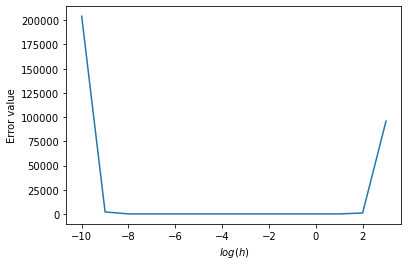

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
mach_err= 2.2*(10**-16)
def diff_4(x):
    return np.exp(np.sin(2*x))*((np.sin(2*x)*(3*np.cos(2*x)+1)+(np.cos(2*x)**4)-(6*np.sin(2*x)-4)*np.cos(2*x)**2))
def f(x):
    return np.exp(np.sin(2*x))
def error(x,h):
    return (h**2/48)*abs(diff_4(x))+(4*abs(f(x))*mach_err)/(h**2)
h = [10**-n for n in range (-3,11)]
h=np.array(h)
err_val = error(0.5,h)
h_err=np.dstack((h,err_val))
table_h_err=tabulate(enumerate(h_err))
print("            h","        ","error value")
print(table_h_err)
plt.plot(np.log(h)/np.log(10),err_val)
plt.xlabel("$log(h)$")
plt.ylabel("Error value")

Problem 3

Third derivative through the central difference:

\begin{equation}
f^{(3)}(x)=lim_{h\rightarrow 0}\frac{f''\left( x+\frac{h}{2} \right)-f''\left( x-\frac{h}{2}\right)}{h}
\end{equation}

expanding the taylor series wrt $\frac{h}{2}$:
\begin{align}
f\left( x+\frac{h}{2} \right)=f(x)+f'(x)\frac{h}{2}+f^{''}(x)\frac{h^2}{8}+f^{'''}(x)\frac{h^3}{48}+f^{(4)}(x)\frac{h^4}{192}+f^{(5)}(x)\frac{h^5}{960}...
\end{align}

\begin{align}
f\left(x-\frac{h}{2} \right)=f(x)-f'(x)\frac{h}{2}+f^{''}(x)\frac{h^2}{8}-f^{'''}(x)\frac{h^3}{48}+f^{(4)}(x)\frac{h^4}{192}-f^{(5)}(x)\frac{h^5}{960}...
\end{align}

\begin{align}
f\left( x+\frac{h}{2} \right) -f\left(x-\frac{h}{2} \right)=hf'(x)+f^{(3)}(x)\frac{h^3}{24} +O(h^5)
\end{align}


\begin{align}
f^{(3)}(x)\frac{h^3}{24} = f\left( x+\frac{h}{2} \right) -f\left(x-\frac{h}{2} \right)-hf'(x)+O(h^5)
\end{align}

\begin{align}
f^{(3)}(x) = 24\frac{f\left( x+\frac{h}{2} \right) -f\left(x-\frac{h}{2} \right)}{h^3}-24\frac{f'(x)}{h^2}+O(h^2)
\end{align}

Problem 4)

The second forward difference was found to be :
\begin{equation}
R_{fd}(h)=\frac{4f\left(x+\frac{h}{2}\right)-f(x+h)-3f(x)}{h} + O(h^2)=D_{fd}\left(\frac{h}{2}\right) - D_{fd}(h)+ O(h^2)
\end{equation}

As per Richardson extrpaolation:
\begin{equation}
G=\frac{2^pg\left(\frac{h}{2}\right)-g(h)}{2^p-1}+O(h^{p+q})
\end{equation}

Our second forward difference at $\frac{h}{2}$ and $h$ respectively:
\begin{equation}
R_{fd}\left(\frac{h}{2}\right)=2\frac{4f\left(x+\frac{h}{4}\right)-f\left(x+\frac{h}{2}\right)-3f(x)}{h} + O(h^2)\\
R_{fd}(h)=\frac{4f\left(x+\frac{h}{2}\right)-f(x+h)-3f(x)}{h} + O(h^2)
\end{equation}

Plugging these into richardson extrapolation, using $p=2$ and $q=1$ as the next suriving term is of order 4:
\begin{equation}
R^{(2)}_{fd}=\frac{4}{3}\left(2\frac{4f\left(x+\frac{h}{4}\right)-f\left(x+\frac{h}{2}\right)-3f(x)}{h}\right)-\frac{4f\left(x+\frac{h}{2}\right)-f(x+h)-3f(x)}{3h}
\end{equation}



\begin{equation}
R^{(2)}_{fd}=\frac{32f\left(x+\frac{h}{4}\right)-12f\left(x+\frac{h}{2}\right) -21f(x)}{3h} +O(h^3)
\end{equation}

Problem 5)

\begin{equation}
P_c(x)=\frac{dt}{dx}\frac{1}{T} \\
\end{equation}


We know that : $x=x_0sin(\omega t)$
which gives us:
\begin{equation}
t=\frac{1}{\omega}sin^{-1}\left(\frac{x}{x_0}\right)
\end{equation}

\begin{equation}
\frac{dt}{dx}=\frac{1}{\omega\sqrt{x_0^2-x^2}}
\end{equation}

This gives us the probability density:
\begin{equation}
P_c(x)=\frac{1}{\omega T\sqrt{x_0^2-x^2}}
\end{equation}

C:\Users\danie\AppData\Local\Temp\ipykernel_9816\384919759.py:10: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(omega*T*np.sqrt(x0**2-x**2))


Text(0, 0.5, 'Probobaility Amplitude')

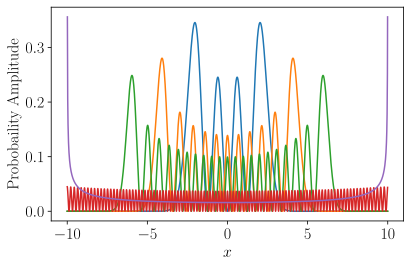

In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
x=0
n=0
def classical(x):
    T=1
    x0=10
    omega = 2*np.pi/T
    return 1/(omega*T*np.sqrt(x0**2-x**2))
def hermite(x,n):
    val0 = 1.; val1 = 2*x
    for j in range(1,n):
        val2 = 2*x*val1 - 2*j*val0
        val0, val1 = val1, val2
    dval2 = 2*n*val0
    return val2
%config InlineBackend.figure_format = 'svg'
# For tex fonts and math-mode in figures
plt.rcParams['text.latex.preamble']=r'\usepackage{lmodern}'
params = {'text.usetex':True,'font.size':16,'font.family':
'serif','figure.autolayout': True}
plt.rcParams.update(params)
x=np.arange(-10,10,0.01)
def recip(n):
    return(1/m.sqrt((2**n)*m.factorial(n)*m.sqrt(np.pi)))
def wfunc(x,n):
    return hermite(x,n)*np.exp(-0.5*x**2)*recip(n)
z = wfunc(x,30)
n=[3,10,20,150]
for elements in n:
    plt.plot(x,wfunc(x,elements)**2)
plt.plot(x,classical(x))
plt.xlabel('$x$')
plt.ylabel('Probobaility Amplitude')

Problem 6
\begin{equation}
\psi_n(x,y,z)=\frac{1}{\sqrt{(2^nn!)^3}}e^{\frac{x^2+y^2+z^2}{2}}H_n(x)H_n(y),H_n(z) \\ n=\sqrt{n_x^2+n_y^2+n_z^2}
\end{equation}

\begin{align}
\partial_x^2{f}=\frac{f\left( x+\frac{h}{2} ,y,z\right)+f\left(x-\frac{h}{2},y,z\right)-2f(x,y,z)}{h^2}+O(h^2)\\
\partial_y^2{f}=\frac{f\left( x,y+\frac{h}{2},z\right)+f\left(x,y-\frac{h}{2},z\right)-2f(x,y,z)}{h^2}+O(h^2)\\
\partial_z^2{f}=\frac{f\left( x ,y,z+\frac{h}{2}\right)+f\left(x,y,z-\frac{h}{2}\right)-2f(x,y,z)}{h^2}+O(h^2)
\end{align}


In [5]:
def QHO3D(nx,ny,nz,x,y,z):
    n=nx+ny+nz
    return (recip(n)**3)*np.exp(0.5*((x**2)+(y**2)+(y**2)))*hermite(x,nx)*hermite(y,ny)*hermite(z,nz)
def kinetic(nx,ny,nz,x,y,z,h):
    psiold =QHO3D(nx,ny,nz,x,y,z)
    
    psipx = QHO3D(nx,ny,nz,x+h,y,z)
    psimx = QHO3D(nx,ny,nz,x-h,y,z)
    laplx = (psipx + psimx - 2.*psiold)/h**2
    
    
    psipy = QHO3D(nx,ny,nz,x,y+h,z)
    psimy = QHO3D(nx,ny,nz,x,y-h,z)
    laply = (psipy + psimy - 2.*psiold)/h**2
    
    psiold =QHO3D(nx,ny,nz,x,y,z)
    psipz = QHO3D(nx,ny,nz,x,y,z+h)
    psimz = QHO3D(nx,ny,nz,x,y,z-h)
    laplz = (psipz + psimz - 2.*psiold)/h**2
    kin = -0.5*(laplx+laply+laplz)/(psiold)
    return kin 

x=np.arange(-10,10,0.0001)
y=np.arange(-10,10,0.0001)
z=np.arange(-10,10,0.0001)

f=kinetic(3,3,3,x,y,z,0.005)
np.mean(f)

-93.31874244319737

Problem 7)
The 3D Quantum well has the wave function:
\begin{equation}
\psi(x,y,z)=\sqrt{\frac{8}{L^3}}sin(k_xx)sin(k_yy)sin(k_zz)\\
k_i=\frac{n_i\pi}{L}
\end{equation}

In [9]:
n_tuples={}
for x in range(1,65):
    for y in range(1,65):
        for z in range(1,65):
            if (x**2)+(y**2)+(z**2) not in list(n_tuples.keys()):
                n_tuples[(x**2)+(y**2)+(z**2)]=[np.array([x,y,z])]
            else:
                 n_tuples[(x**2)+(y**2)+(z**2)].append(np.array([x,y,z]))
keys = list(n_tuples.keys())
keys.sort()
print(keys)
n_cardinal={}
for element in keys:
    n_cardinal[element]=n_tuples[element]
def psibox(n,x,L):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)
def psibox3d(n,x,y,z,l):
    solutions=[]
    for element in n_cardinal[n]:
        solutions.append(psibox(element[0],x,l)*psibox(element[1],y,l)*psibox(element[2],z,l))
    return solutions
x=np.arange(-10,10,1)
y=np.arange(-10,10,1)
z=np.arange(-10,10,1)
psibox3d(54,x,y,z,10)     

[3, 6, 9, 11, 12, 14, 17, 18, 19, 21, 22, 24, 26, 27, 29, 30, 33, 34, 35, 36, 38, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 53, 54, 56, 57, 59, 61, 62, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 81, 82, 83, 84, 86, 88, 89, 90, 91, 93, 94, 96, 97, 98, 99, 101, 102, 104, 105, 106, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 125, 126, 129, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 149, 150, 152, 153, 154, 155, 157, 158, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 189, 190, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202, 203, 204, 205, 206, 209, 210, 211, 212, 213, 214, 216, 217, 218, 219, 221, 222, 224, 225, 226, 227, 228, 229, 230, 233, 234, 235, 236, 237, 238, 241, 242, 243, 244, 245, 246, 248, 249, 250, 251, 253, 254, 257, 258, 259, 260, 261, 262, 264, 265, 266, 267, 268, 269, 270, 272, 273, 274, 275, 276, 277, 278, 280, 281, 282, 283, 285, 286

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[array([ 2.29988216e-48,  1.31432778e-02, -4.75528258e-02,  2.12662702e-02,
         2.93892626e-02,  1.09535740e-17, -2.93892626e-02, -2.12662702e-02,
         4.75528258e-02, -1.31432778e-02,  0.00000000e+00,  1.31432778e-02,
        -4.75528258e-02,  2.12662702e-02,  2.93892626e-02, -1.09535740e-17,
        -2.93892626e-02, -2.12662702e-02,  4.75528258e-02, -1.31432778e-02]),
 array([ 2.29988216e-48,  1.31432778e-02, -4.75528258e-02,  2.12662702e-02,
         2.93892626e-02,  1.09535740e-17, -2.93892626e-02, -2.12662702e-02,
         4.75528258e-02, -1.31432778e-02,  0.00000000e+00,  1.31432778e-02,
        -4.75528258e-02,  2.12662702e-02,  2.93892626e-02, -1.09535740e-17,
        -2.93892626e-02, -2.12662702e-02,  4.75528258e-02, -1.31432778e-02]),
 array([ 2.29988216e-48,  1.31432778e-02, -4.75528258e-02,  2.12662702e-02,
         2.93892626e-02,  1.09535740e-17, -2.93892626e-02, -2.12662702e-02,
         4.75528258e-02, -1.31432778e-02,  0.00000000e+00,  1.31432778e-02,
        

Problem 8

Our wave function:
\begin{equation}
\psi(x)=Ae^{ikx}+Be^{-ikx} , x<0 \\
\psi(x)=Ce^{-\kappa x} , x>0
\end{equation}

\begin{equation}
\psi(x)=A\left(e^{ikx}+\frac{B}{A}e^{-ikx}\right)\\
\psi(x)=A\left(\frac{C}{A}e^{-\kappa x}\right)
\end{equation}

\begin{equation}
\partial^2_x{\psi}=A\left(-k^2e^{ikx}-k^2\frac{B}{A}e^{-ikx}\right)\\
\partial^2_x{\psi(x)}=A\left(\kappa^2\frac{C}{A}e^{-\kappa x}\right)
\end{equation}

We know that Kinetic Energy is:
\begin{equation}
T=\frac{-1}{2\psi}\partial^2_x{\psi}
\end{equation}

The kinetic energy hence becomes:
\begin{equation}
T =\frac{-k^2e^{ikx}-k^2\frac{B}{A}e^{-ikx}}{2\left(e^{ikx}+\frac{B}{A}e^{-ikx}\right)}=\frac{k^2}{2}=2\\
T=\frac{\kappa^2\frac{C}{A}e^{-\kappa x}}{2\frac{C}{A}e^{-\kappa x}}=\frac{-\kappa^2}{2}=-8
\end{equation}

In [9]:
import cmath
import numpy as np
import matplotlib.pyplot as plt
B_A=2/(1+1j*2)
C_A=(1-1j*2)/(1+1j*2)
def finiteWell(x):
    if x < 0:
        return np.exp((1j*2*x))+B_A*np.exp(-1j*2*x)
    elif x>0:
        return C_A*np.exp(-4*x)
def kinetic(f_x,x,h):
    psiold=f_x(x)
    psi_p=f_x(x+h)
    psi_m=f_x(x-h)
    
    lapl=(psi_p + psi_m - 2.*psiold)/h**2
    return -0.5*lapl/psiold
kinetic(finiteWell,5,0.0005).real
x=np.arange(-10,-0.1,0.001)
plt.plot(x,finiteWell(x))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [8]:
n_cardinal

{3: [array([1, 1, 1])],
 6: [array([1, 1, 2]), array([1, 2, 1]), array([2, 1, 1])],
 9: [array([1, 2, 2]), array([2, 1, 2]), array([2, 2, 1])],
 11: [array([1, 1, 3]), array([1, 3, 1]), array([3, 1, 1])],
 12: [array([2, 2, 2])],
 14: [array([1, 2, 3]),
  array([1, 3, 2]),
  array([2, 1, 3]),
  array([2, 3, 1]),
  array([3, 1, 2]),
  array([3, 2, 1])],
 17: [array([2, 2, 3]), array([2, 3, 2]), array([3, 2, 2])],
 18: [array([1, 1, 4]), array([1, 4, 1]), array([4, 1, 1])],
 19: [array([1, 3, 3]), array([3, 1, 3]), array([3, 3, 1])],
 21: [array([1, 2, 4]),
  array([1, 4, 2]),
  array([2, 1, 4]),
  array([2, 4, 1]),
  array([4, 1, 2]),
  array([4, 2, 1])],
 22: [array([2, 3, 3]), array([3, 2, 3]), array([3, 3, 2])],
 24: [array([2, 2, 4]), array([2, 4, 2]), array([4, 2, 2])],
 26: [array([1, 3, 4]),
  array([1, 4, 3]),
  array([3, 1, 4]),
  array([3, 4, 1]),
  array([4, 1, 3]),
  array([4, 3, 1])],
 27: [array([1, 1, 5]), array([1, 5, 1]), array([3, 3, 3]), array([5, 1, 1])],
 29: [array

In [10]:
psibox3d(54,x,y,z,10)     

[array([ 2.29988216e-48,  1.31432778e-02, -4.75528258e-02,  2.12662702e-02,
         2.93892626e-02,  1.09535740e-17, -2.93892626e-02, -2.12662702e-02,
         4.75528258e-02, -1.31432778e-02,  0.00000000e+00,  1.31432778e-02,
        -4.75528258e-02,  2.12662702e-02,  2.93892626e-02, -1.09535740e-17,
        -2.93892626e-02, -2.12662702e-02,  4.75528258e-02, -1.31432778e-02]),
 array([ 2.29988216e-48,  1.31432778e-02, -4.75528258e-02,  2.12662702e-02,
         2.93892626e-02,  1.09535740e-17, -2.93892626e-02, -2.12662702e-02,
         4.75528258e-02, -1.31432778e-02,  0.00000000e+00,  1.31432778e-02,
        -4.75528258e-02,  2.12662702e-02,  2.93892626e-02, -1.09535740e-17,
        -2.93892626e-02, -2.12662702e-02,  4.75528258e-02, -1.31432778e-02]),
 array([ 2.29988216e-48,  1.31432778e-02, -4.75528258e-02,  2.12662702e-02,
         2.93892626e-02,  1.09535740e-17, -2.93892626e-02, -2.12662702e-02,
         4.75528258e-02, -1.31432778e-02,  0.00000000e+00,  1.31432778e-02,
        

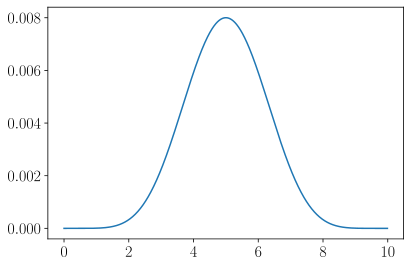

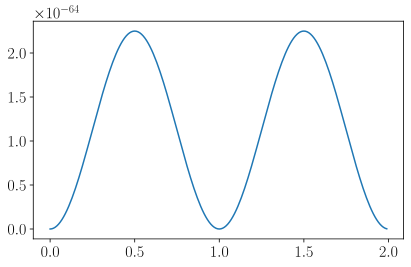